# ディープラーニングでタッチの達也と和哉の分類をする

## 画像のリサイズ
参考: https://note.nkmk.me/python-pillow-image-resize/

In [8]:
import os
import glob
import re
import copy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
files = glob.glob('../images/touch_comic/*.png')

for f in files:
    img = Image.open(f)
    img_resize = img.resize((128, 128))
    ftitle, fext = os.path.splitext(f)
    img_resize.save(ftitle + '_resized' + fext)

## data augumentationを用いて学習データを生成

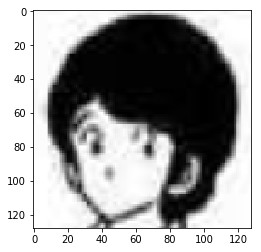

In [13]:
img = load_img("../images/touch_comic/kazuya1_resized.png", grayscale=True)
plt.imshow(img, cmap='gray')
plt.show()

In [14]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 128, 128, 1)

In [20]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
ftitle, fext = os.path.splitext(glob.glob("../images/touch_comic/kazuya1_resized.png")[0])
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='.', save_prefix=ftitle, save_format='png'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

### 全ての画像を処理

In [24]:
files = glob.glob('../images/touch_comic/*.png')

for f in files:
    ftitle, fext = os.path.splitext(f)
    img = load_img(f, grayscale=True)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='.', save_prefix=ftitle, save_format='png'):
        i += 1
        if i > 20:
            break  # otherwise the generator would loop indefinitely

## 画像を取り込む

In [14]:
K.backend(), K.image_dim_ordering()

img_array = []
label = []

files = glob.glob('../images/touch_comic/*.png')

for f in files:
    img_array.append(img_to_array(load_img(f, grayscale=True)))
    label.append(re.findall(r"(kazuya|tatsuya)", f)[0])

AttributeError: 'list' object has no attribute 'shape'